In [31]:
# read the file as a table
# it hasn't worked 

import pandas as pd

df = pd.read_table("Data/LAST DATA.txt")
df

,FN Clarivate Analytics Web of Science
0,VR 1.0
1,PT J
2,"AU Abdulsalam, AA"
3,"Bashour, HN"
4,"Monem, FS"
...,...
32806,GA ML977
32807,UT WOS:A1981ML97700009
32808,DA 2020-02-10
32809,ER


In [16]:
# number of articles in the Dataset

with open("Data/LAST DATA.txt", "r", encoding='utf-8') as f:
    
    n_article=0
    for line in f:
        if line.startswith("AF"):
            #print(line)
            n_article +=1
    print(n_article)
                

418


In [42]:
# finding out authors
# each author is the value of i'th key of the dictionary 

with open("Data/LAST DATA.txt", "r", encoding='utf-8') as f:
    
    af_counter=False
    index =0
    af_dict={}
    
    for line in f:
        if line.startswith("AF"):
            af_dict[index] = line[3:].strip()
            index +=1
            af_counter= True
            continue
        if line.startswith("TI"):
            af_counter=False
            continue
        if af_counter:
            af_dict[index] = line[3:].strip()
            index +=1
            
print(af_dict)

{0: 'Abdulsalam, AA', 1: 'Bashour, HN', 2: 'Monem, FS', 3: 'Hamadeh, FM', 4: 'Acicbe, Oznur', 5: 'Agbemenu, Kafuli', 6: 'Auerbach, Samantha', 7: 'Murshid, Nadine Shaanta', 8: 'Shelton, James', 9: 'Amutah-Onukagha, Ndidiamaka', 10: 'Agbemenu, Kafuli', 11: 'Agbemenu, Kafuli', 12: 'Volpe, Ellen M.', 13: 'Dyer, Ervin', 14: 'Agutter, K.', 15: 'Ankeny, R. A.', 16: 'Agutter, Karen', 17: 'Ankeny, Rachel A.', 18: 'Ahmad, Kham Sila', 19: 'Armarego, Jocelyn', 20: 'Sudweeks, Fay', 21: 'IEEE', 22: 'Ahmed, Asma', 23: 'Bowen, Angela', 24: 'Feng, Cindy Xin', 25: 'Al-Modallal, Hanan', 26: 'Al-Natour, Ahlam', 27: 'Al-Ostaz, Samar Mohammad', 28: 'Morris, Edith J.', 29: 'al-Shar, Sahar', 30: 'al-Tarawneh, Muhammad', 31: 'ALEXANDRAKI, C', 32: 'Allden, K', 33: 'Allen, Elizabeth M.', 34: 'Lee, Hee Yun', 35: 'Pratt, Rebekah', 36: 'Vang, Houa', 37: 'Desai, Jay R.', 38: 'Dube, Amano', 39: 'Lightfoot, Elizabeth', 40: 'Allotey, P', 41: 'Allwood, G.', 42: 'Wadia, K.', 43: 'Allwood, Gill', 44: 'Wadia, Khursheed', 4

In [45]:
# turning the dictionary to a pandas Series object

af = pd.Series(af_dict)
af

0            Abdulsalam, AA
1               Bashour, HN
2                 Monem, FS
3               Hamadeh, FM
4             Acicbe, Oznur
               ...         
1259         Magarati, Maya
1260      Jackson, J. Carey
1261    Taylor, Victoria M.
1262            [Anonymous]
1263            [Anonymous]
Length: 1264, dtype: object

In [73]:
# finding out frequencies of data and print out top 20 

af_counts =af.value_counts(ascending=True).tail(20)
af_counts

Saadi, Altaf                 4
Ussher, Jane M.              5
Liamputtong, Pranee          5
Hawkey, Alexandra J.         5
Silka, Linda                 5
Rogers, Beatrice Lorge       5
Wilde, Parke E.              5
Bond, Barbara                5
Bermudez, Odilia I.          5
Peterman, Jerusha Nelson     5
Freedman, J                  6
Gerard, A                    6
Percac-Lima, Sanja           6
Wadia, Khursheed             6
Perz, Janette                6
Allwood, Gill                6
Edward, JK                   7
Lenette, Caroline            8
Allwood, G                  12
Wadia, K                    12
dtype: int64

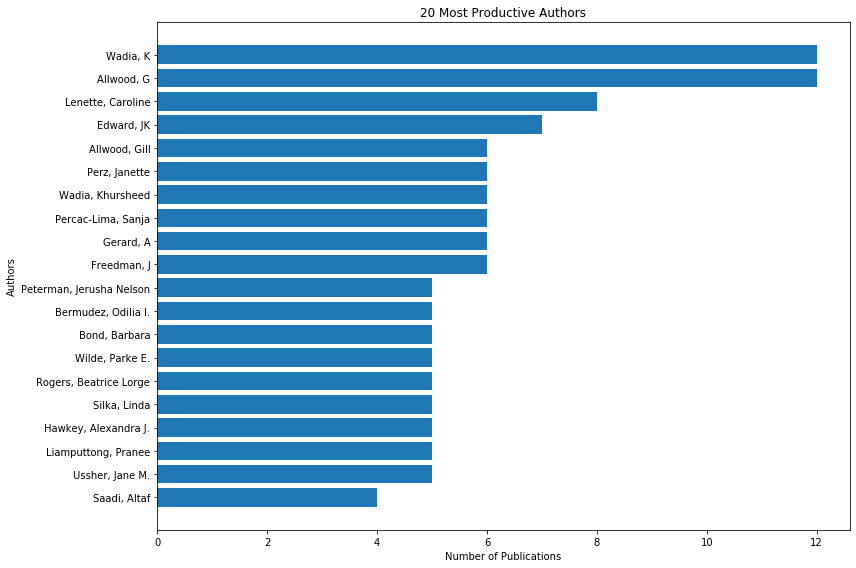

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

# use plt.barh method for horizontal bar
ax.barh(af_counts.index, af_counts)  

# add labels
plt.ylabel("Authors")
plt.xlabel("Number of Publications")

# add Title
plt.title("20 Most Productive Authors") 

# arange padding
plt.tight_layout()

# display the plot
plt.show()

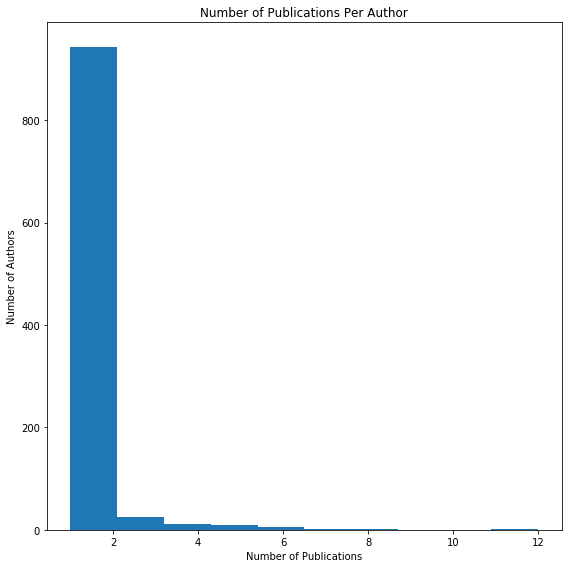

In [95]:
af_counts_1 =af.value_counts()
af_counts_1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

# use plt.barh method for horizontal bar
ax.hist(af_counts_1) 

# add labels
plt.ylabel("Number of Authors")
plt.xlabel("Number of Publications")

# add Title
plt.title("Number of Publications Per Author") 

# arange padding
plt.tight_layout()

plt.show()